In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

data_path = '/content/drive/My Drive/movielens/ml-100k/'

ratings_columns = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv(data_path + 'u.data', sep='\t', names=ratings_columns)

user_columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
users = pd.read_csv(data_path + 'u.user', sep='|', names=user_columns)

movie_columns = ['movie_id', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL',
                 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy',
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror',
                 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv(data_path + 'u.item', sep='|', names=movie_columns, encoding='latin-1')

In [4]:
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
ratings['day'] = ratings['timestamp'].dt.day

In [5]:
genre_counts = movies.iloc[:, 5:].sum().sort_values(ascending=False)
print(genre_counts)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Children's     122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
unknown          2
dtype: int64


In [6]:
movie_ratings = ratings.groupby('movie_id')['rating'].agg(['mean', 'count']).reset_index()
movie_ratings.rename(columns={'mean': 'average_rating', 'count': 'num_ratings'}, inplace=True)

user_ratings = ratings.groupby('user_id')['rating'].agg(['mean', 'count']).reset_index()
user_ratings.rename(columns={'mean': 'user_avg_rating', 'count': 'user_num_ratings'}, inplace=True)

**Explaratory Data Analsis**

In [7]:
print(ratings.describe())
print(users.describe())
print(movies.describe())

            user_id       movie_id         rating  \
count  100000.00000  100000.000000  100000.000000   
mean      462.48475     425.530130       3.529860   
min         1.00000       1.000000       1.000000   
25%       254.00000     175.000000       3.000000   
50%       447.00000     322.000000       4.000000   
75%       682.00000     631.000000       4.000000   
max       943.00000    1682.000000       5.000000   
std       266.61442     330.798356       1.125674   

                           timestamp           year         month  \
count                         100000  100000.000000  100000.00000   
mean   1997-12-31 00:40:51.488619904    1997.471010       6.81569   
min              1997-09-20 03:05:10    1997.000000       1.00000   
25%       1997-11-13 19:18:29.500000    1997.000000       2.00000   
50%              1997-12-22 21:42:24    1997.000000       9.00000   
75%              1998-02-23 18:53:04    1998.000000      11.00000   
max              1998-04-22 23:10:38   

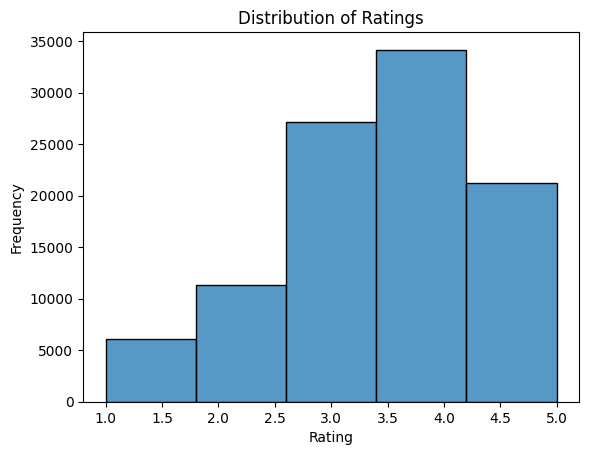

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

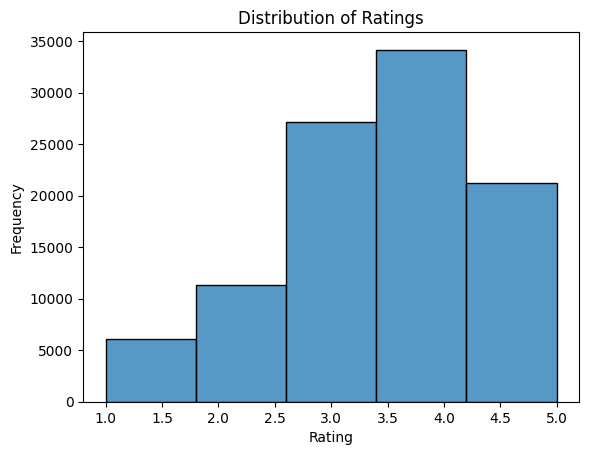

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(ratings['rating'], bins=5, kde=False)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

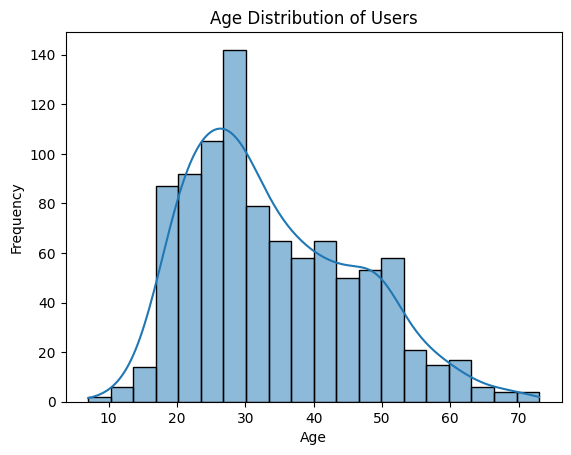

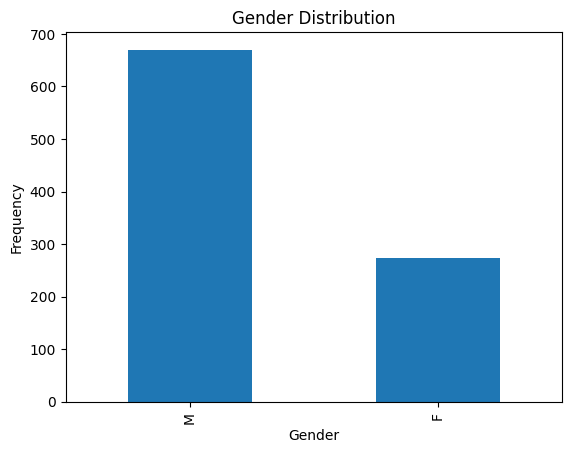

In [10]:
sns.histplot(users['age'], bins=20, kde=True)
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

gender_counts = users['gender'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

In [11]:
most_rated = ratings['movie_id'].value_counts().head(10)
most_rated_movies = movies[movies['movie_id'].isin(most_rated.index)][['movie_id', 'movie_title']]
print(most_rated_movies)

     movie_id                    movie_title
0           1               Toy Story (1995)
49         50               Star Wars (1977)
99        100                   Fargo (1996)
120       121  Independence Day (ID4) (1996)
180       181      Return of the Jedi (1983)
257       258                 Contact (1997)
285       286    English Patient, The (1996)
287       288                  Scream (1996)
293       294               Liar Liar (1997)
299       300           Air Force One (1997)


Film-Noir      3.548351
War            3.489185
Musical        3.376423
Mystery        3.336814
Animation      3.298813
Romance        3.244049
Documentary    3.229273
Crime          3.211015
Drama          3.187353
Western        3.185617
Sci-Fi         3.165446
Adventure      3.143967
Thriller       3.136692
Comedy         3.000565
Action         2.966332
Children's     2.916885
Fantasy        2.849830
Horror         2.730157
unknown        2.222222
dtype: float64


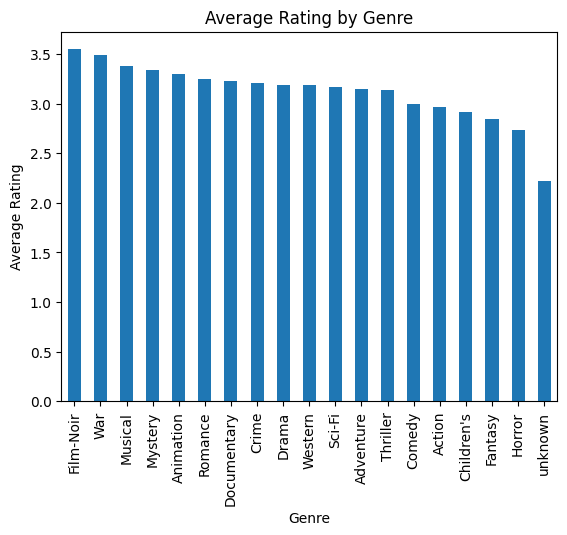

In [12]:
movies.rename(columns={movies.columns[0]: 'movie_id'}, inplace=True)

movie_ratings_genres = pd.merge(movie_ratings, movies, on='movie_id', how='inner')

genre_columns = ['unknown', 'Action', 'Adventure', 'Animation', "Children's",
                 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
                 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
                 'Sci-Fi', 'Thriller', 'War', 'Western']

genre_avg_ratings = {}
for genre in genre_columns:
    genre_avg_ratings[genre] = movie_ratings_genres[movie_ratings_genres[genre] == 1]['average_rating'].mean()

genre_avg_ratings = pd.Series(genre_avg_ratings).sort_values(ascending=False)
print(genre_avg_ratings)

genre_avg_ratings.plot(kind='bar', title='Average Rating by Genre', xlabel='Genre', ylabel='Average Rating')
plt.show()

Correlation between number of ratings and average rating: 0.42965916986762326


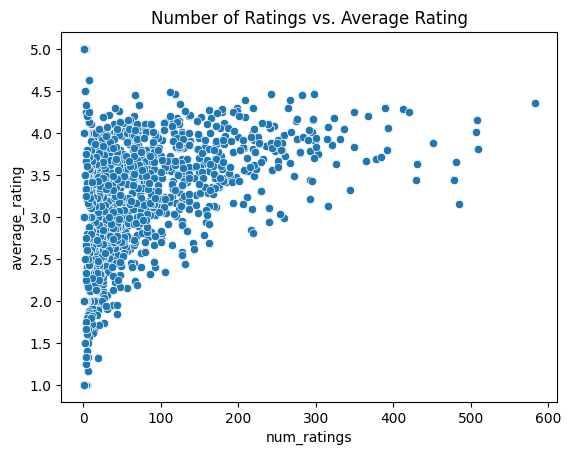

In [13]:
correlation = movie_ratings['num_ratings'].corr(movie_ratings['average_rating'])
print(f"Correlation between number of ratings and average rating: {correlation}")

sns.scatterplot(data=movie_ratings, x='num_ratings', y='average_rating')
plt.title('Number of Ratings vs. Average Rating')
plt.show()

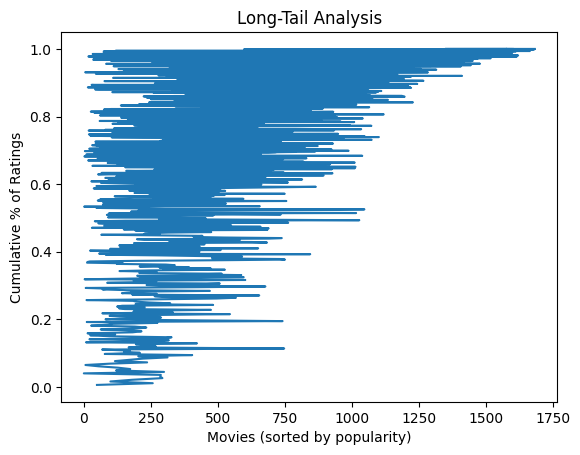

In [14]:
movie_ratings = movie_ratings.sort_values('num_ratings', ascending=False)
movie_ratings['cumulative_percentage'] = movie_ratings['num_ratings'].cumsum() / movie_ratings['num_ratings'].sum()

movie_ratings['cumulative_percentage'].plot(kind='line', title='Long-Tail Analysis', xlabel='Movies (sorted by popularity)', ylabel='Cumulative % of Ratings')
plt.show()

In [15]:
full_data = pd.merge(ratings, users, on='user_id')
full_data = pd.merge(full_data, movies, on='movie_id')
full_data.to_csv('/content/drive/My Drive/movielens/ml-100k/processed_data.csv', index=False)